In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Check training will be done on GPU
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    

Default GPU Device: /device:GPU:0


In [3]:
# Retrieve MNIST dataset
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Ensure data is correct
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


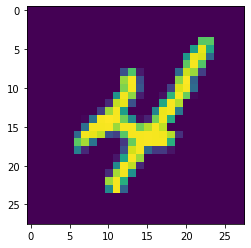

In [5]:
# Print Dataset Image
plt.imshow(x_train[9])

In [6]:
# Print Classes Present
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [7]:
# Create one-hot-vectors of the labels
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)
print(y_train_enc.shape)
print(y_test_enc.shape)

(60000, 10)
(10000, 10)


In [8]:
# Unrolling the matrices into vectors
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [9]:
# Normalising the Input Data
mean = np.mean(np.vstack((x_train_reshaped,x_test_reshaped)))
std_dev = np.std(np.vstack((x_train_reshaped,x_test_reshaped)))

x_train_norm = (x_train_reshaped - mean) / (std_dev + 1e-10)
x_test_norm = (x_test_reshaped - mean) / (std_dev + 1e-10)

x_train_norm = x_train_reshaped / 255
x_test_norm = x_test_reshaped / 255 

In [10]:
# Creating the Model

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [11]:
# Compiling the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Training
model.fit(x_train_norm, y_train_enc, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2311 - accuracy: 0.9317
Epoch 2/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0980 - accuracy: 0.9696
Epoch 3/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0675 - accuracy: 0.9789
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0524 - accuracy: 0.9828
Epoch 5/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0417 - accuracy: 0.9865
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0340 - accuracy: 0.9888
Epoch 7/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0277 - accuracy: 0.9908
Epoch 8/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0236 - accuracy: 0.9922
Epoch 9/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0203 - accuracy: 0.9930
Epoch 10/10
60

In [13]:
# Evaluating
loss, accuracy = model.evaluate(x_test_norm, y_test_enc)

10000/10000 [==============================] - 0s 43us/sample - loss: 0.1068 - accuracy: 0.9767


In [14]:
# Retrieving model predictions
preds = model.predict(x_test_norm)

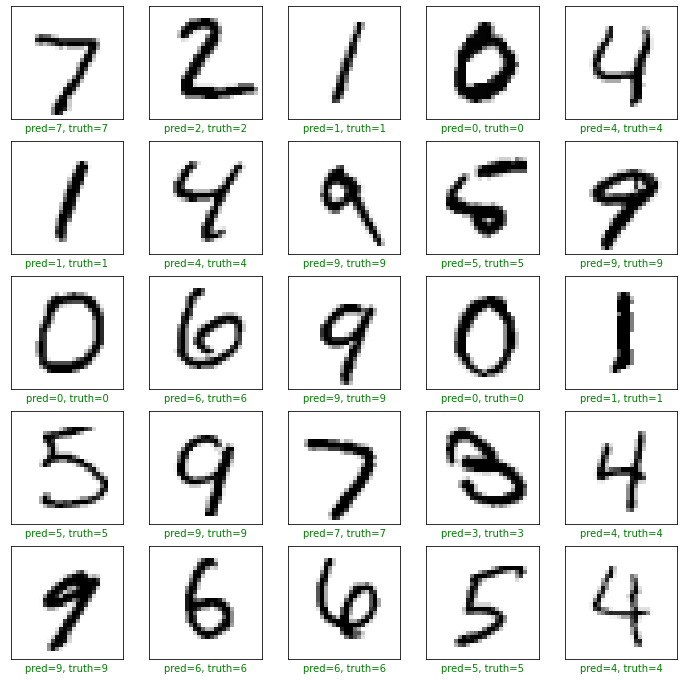

In [15]:
# Visualy diplaying model accuracy
plt.figure(figsize=(12,12))
offset = 0
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[offset+i])
    gt = y_test[offset+i]
    
    col='g'
    if pred !=gt:
        col = 'b'
    
    plt.xlabel('pred={}, truth={}'.format(pred, gt), color=col)
    plt.imshow(x_test[offset+i], cmap='binary')
plt.show()

In [16]:
# Save the model
model.save('Dense_Digit_Recog_Model.h5')

In [17]:
# # Re-Loading model
# validate_model = tf.keras.models.load_model('Digit_Recog_Model.h5')

# # Show the model architecture
# validate_model.summary()
